In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# If you downloaded the original JSON from
# https://raw.githubusercontent.com/mhollingshead/billboard-hot-100/main/all.json,
# you would do this:

#with open('all.json', 'r') as fh:
#    json_doc = json.load(fh)

In [3]:
# If we were dealing with the raw JSON, you'd do this:
# df = pd.json_normalize(json_doc, 'data', 'date')

In [3]:
# Parquet is a MUCH faster and smaller way of storing data.  Use it instead of .CSV!
df = pd.read_parquet('billboard.parquet')

In [4]:
df.shape

(342987, 7)

In [5]:
df.head(10)

,song,artist,this_week,last_week,peak_position,weeks_on_chart,date
0,Poor Little Fool,Ricky Nelson,1,NaN,1,1,1958-08-04
1,Patricia,Perez Prado And His Orchestra,2,NaN,2,1,1958-08-04
2,Splish Splash,Bobby Darin,3,NaN,3,1,1958-08-04
3,Hard Headed Woman,Elvis Presley With The Jordanaires,4,NaN,4,1,1958-08-04
4,When,Kalin Twins,5,NaN,5,1,1958-08-04
5,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,6,NaN,6,1,1958-08-04
6,Yakety Yak,The Coasters,7,NaN,7,1,1958-08-04
7,My True Love,Jack Scott,8,NaN,8,1,1958-08-04
8,Willie And The Hand Jive,The Johnny Otis Show,9,NaN,9,1,1958-08-04
9,Fever,Peggy Lee,10,NaN,10,1,1958-08-04


In [14]:
df[(df['artist'].str.contains('Taylor Swift'))]

1654

In [16]:
df[(df['artist'].str.contains('Taylor Swift')) & (df['this_week'] == 1)]

,song,artist,this_week,last_week,peak_position,weeks_on_chart,date
282087,We Are Never Ever Getting Back Together,Taylor Swift,1,72.0,1,2,2012-09-01
282187,We Are Never Ever Getting Back Together,Taylor Swift,1,1.0,1,3,2012-09-08
282387,We Are Never Ever Getting Back Together,Taylor Swift,1,2.0,1,5,2012-09-22
292587,Shake It Off,Taylor Swift,1,NaN,1,1,2014-09-06
292687,Shake It Off,Taylor Swift,1,1.0,1,2,2014-09-13
293587,Shake It Off,Taylor Swift,1,2.0,1,11,2014-11-15
293687,Shake It Off,Taylor Swift,1,1.0,1,12,2014-11-22
293787,Blank Space,Taylor Swift,1,13.0,1,3,2014-11-29
293887,Blank Space,Taylor Swift,1,1.0,1,4,2014-12-06
293987,Blank Space,Taylor Swift,1,1.0,1,5,2014-12-13


In [18]:
df[(df['artist'].str.contains('Taylor Swift')) & (df['this_week'] == 1)]['song'].unique()

array(['We Are Never Ever Getting Back Together', 'Shake It Off',
       'Blank Space', 'Bad Blood', 'Look What You Made Me Do', 'Cardigan',
       'Willow', "All Too Well (Taylor's Version)", 'Anti-Hero',
       'Cruel Summer',
       "Is It Over Now? (Taylor's Version) [From The Vault]"],
      dtype=object)

In [20]:
df[(df['artist'].str.contains('Taylor Swift')) & (df['this_week'] == 1)]['song'].nunique()

11

<Axes: xlabel='artist', ylabel='Weeks at #1'>

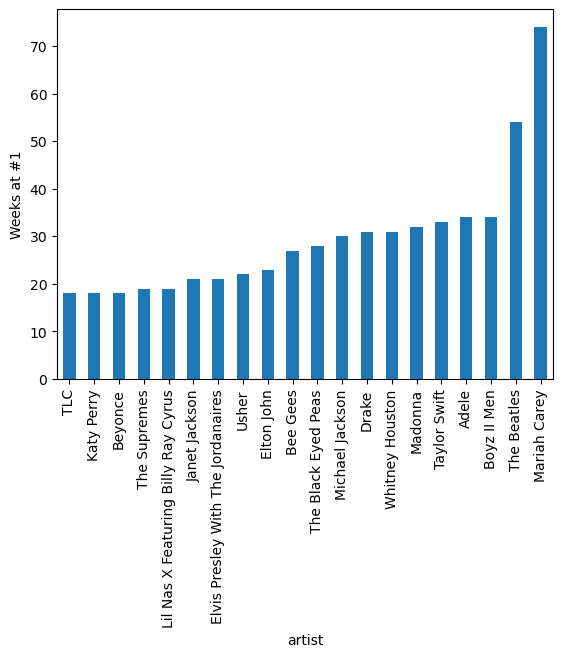

In [33]:
df[df['this_week'] == 1].groupby('artist').size().reset_index(name='count').sort_values('count')[-20:].plot.bar(x='artist', ylabel='Weeks at #1', legend=False)

In [34]:
df[df['this_week'] == 1]

,song,artist,this_week,last_week,peak_position,weeks_on_chart,date
0,Poor Little Fool,Ricky Nelson,1,NaN,1,1,1958-08-04
100,Poor Little Fool,Ricky Nelson,1,1.0,1,2,1958-08-11
200,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,1,2.0,1,3,1958-08-18
300,Little Star,The Elegants,1,2.0,1,4,1958-08-25
400,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,1,2.0,1,5,1958-09-01
...,...,...,...,...,...,...,...
342487,Lose Control,Teddy Swims,1,2.0,1,32,2024-03-30
342587,Like That,"Future, Metro Boomin & Kendrick Lamar",1,NaN,1,1,2024-04-06
342687,Like That,"Future, Metro Boomin & Kendrick Lamar",1,1.0,1,2,2024-04-13
342787,Like That,"Future, Metro Boomin & Kendrick Lamar",1,1.0,1,3,2024-04-20


In [35]:
df['date'].nunique()

3430

<Axes: xlabel='date'>

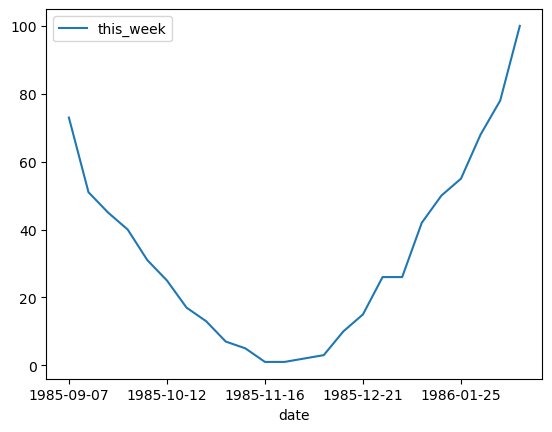

In [36]:
df[(df['artist'] == 'Starship') & (df['song'] == 'We Built This City')][['this_week', 'date']].plot(x='date', y='this_week')

In [37]:
df['chart_value'] = (100 - df['this_week']) + 1

<Axes: xlabel='date'>

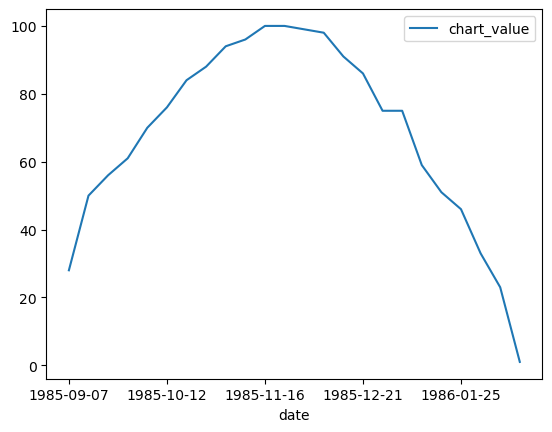

In [38]:
df[(df['artist'] == 'Starship') & (df['song'] == 'We Built This City')][['chart_value', 'date']].plot(x='date', y='chart_value')

<Axes: xlabel='date', ylabel='chart_value'>

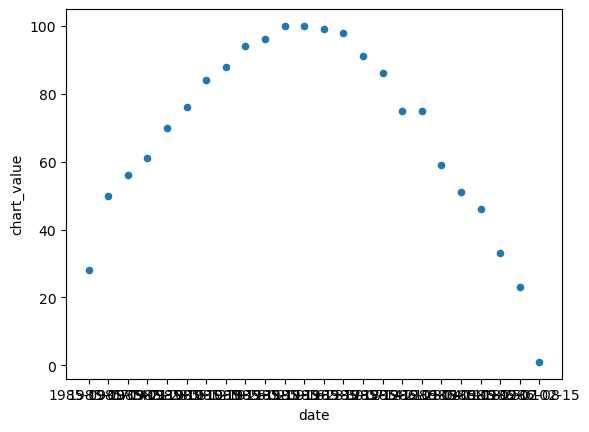

In [39]:
df[(df['artist'] == 'Starship') & (df['song'] == 'We Built This City')][['chart_value', 'date']].plot.scatter(x='date', y='chart_value')

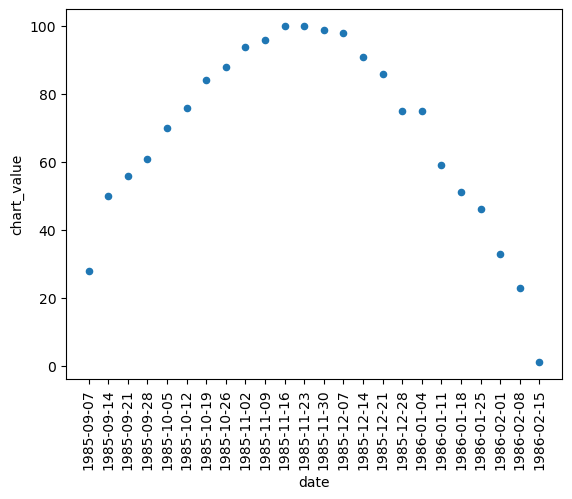

In [40]:
ax = df[(df['artist'] == 'Starship') & (df['song'] == 'We Built This City')][['chart_value', 'date']].plot.scatter(x='date', y='chart_value', rot=90)

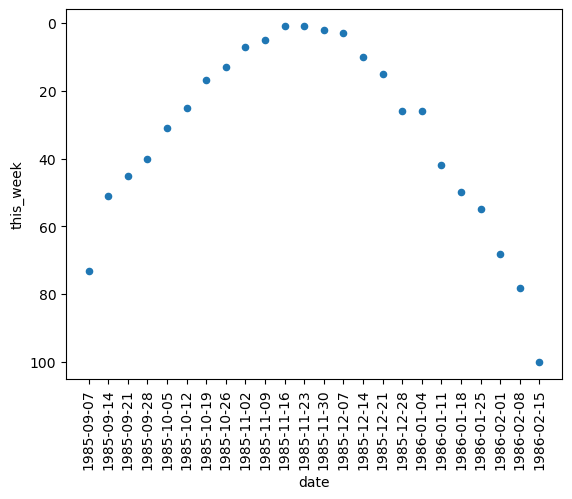

In [41]:
ax = df[(df['artist'] == 'Starship') & (df['song'] == 'We Built This City')].plot.scatter(x='date', y='this_week', rot=90)
ax.invert_yaxis()
plt.show()

<Axes: xlabel='date', ylabel='this_week'>

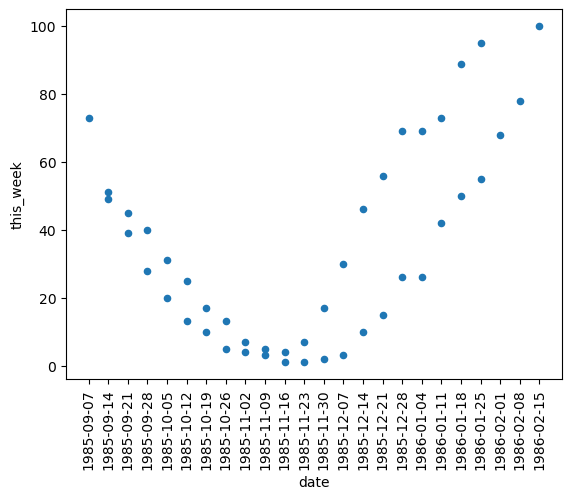

In [42]:
df[((df['artist'] == 'Starship') & (df['song'] == 'We Built This City')) | ((df['artist'] == 'Tears For Fears') & (df['song'] == 'Head Over Heels'))].plot(kind = 'scatter', x='date', y='this_week', rot=90)


In [44]:
two = df[((df['artist'] == 'Starship') & (df['song'] == 'We Built This City')) | ((df['artist'] == 'Tears For Fears') & (df['song'] == 'Head Over Heels'))]

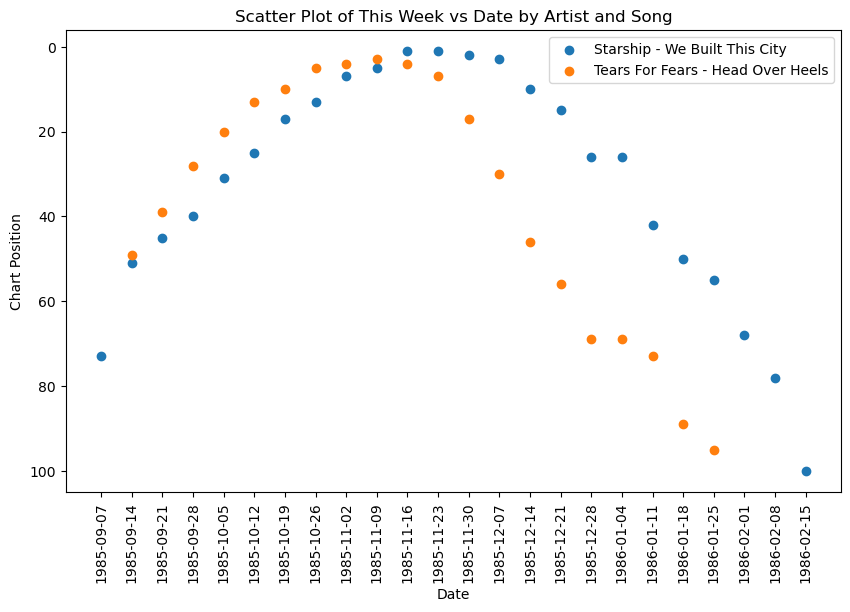

In [45]:
grouped = two.groupby(['artist', 'song'])

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate over each group and plot it separately with a unique color
for (artist, song), group in grouped:
    plt.scatter(group['date'], group['this_week'], label=f'{artist} - {song}')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Chart Position')
plt.title('Scatter Plot of This Week vs Date by Artist and Song')
plt.xticks(rotation=90)
plt.gca().invert_yaxis()

# Add legend
plt.legend()

# Show plot
plt.show()